In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import seaborn as sns
sns.set()

In [19]:
raw_csv_data = pd.read_csv('C:/Users/Jorge/Documents/GitHub/curso-series-temporales/5. Modelos AR autorregresivos/Python/Index2018.csv')
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace = True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method = 'ffill')

In [20]:
df_comp['market_value']=df_comp.ftse

In [21]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [22]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]

<ipython-input-22-fca9bc180084>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1).mul(100)


In [23]:
sts.adfuller(df.returns)

(-12.770265719497356,
 7.798058336033909e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.7672456975)

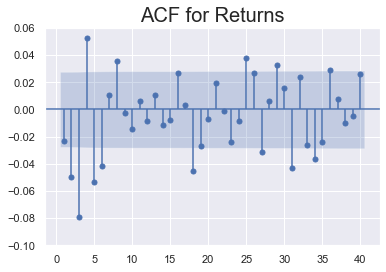

In [31]:
sgt.plot_acf(df.returns, zero=False, lags=40)
plt.title('ACF for Returns', size = 20)
plt.ylim(-.1,0.06)
plt.show()

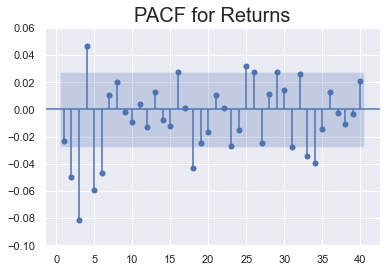

In [60]:
sgt.plot_pacf(df.returns, lags=40, alpha=0.05, zero=False, method=('ols'))
plt.title('PACF for Returns', size = 20)
plt.ylim(-.1,0.06)
plt.show()

Nos fijariamos en la Función de Autocorrelación Parcial porque muestra la mayoría de los puntos dentro de los limites, y la Función de Autocorrelación aunque es muy similar, es diferente lo que necesitamos en ella.<br> Pienso que se necesita investigar 7 retrasos, de la misma manera en la que fue en el caso de precios.

Modelo AR(1)

In [35]:
result_ar_1 = ARIMA(df.returns, order = (1,0,0)).fit()
result_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -7929.749
Date:                Thu, 27 Jan 2022   AIC                          15865.497
Time:                        01:10:40   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.143      0.253      -0.013       0.051
ar.L1         -0.0230      0.009     -2.697      0.007      -0.040      -0.006
sigma2         1.3790      0.014    100.092      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7872.72
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
sts.adfuller(result_ar_1.resid)

(-12.782788720769878,
 7.354275022443665e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.449439368527)

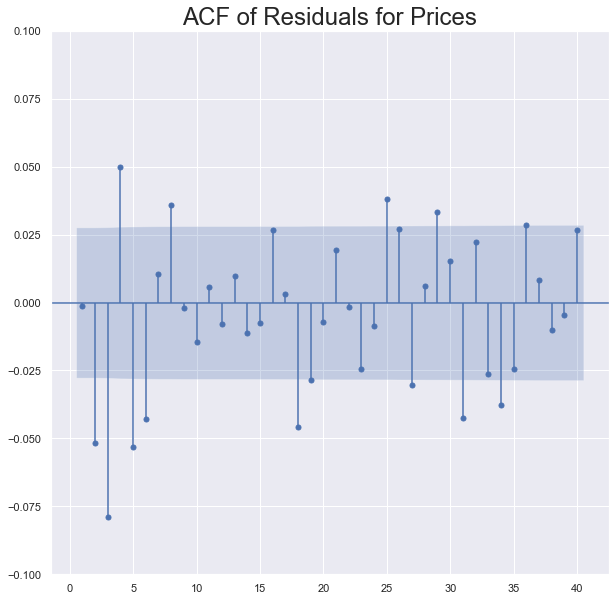

In [48]:
sgt.plot_acf(result_ar_1.resid, zero = False, lags = 40)
plt.title('ACF of Residuals for Prices', size = 24)
plt.gcf().set_size_inches(10,10)
plt.ylim(-.1,.1)
plt.show()

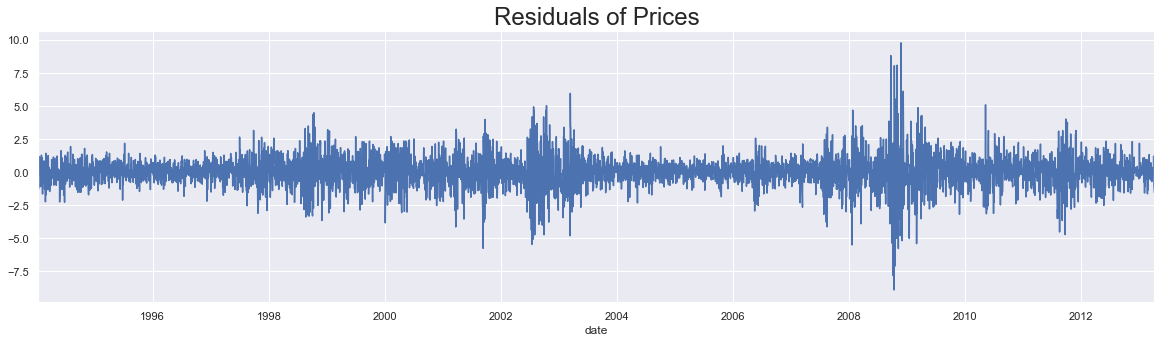

In [47]:
result_ar_1.resid[1:].plot(figsize = (20,5))
plt.title('Residuals of Prices', size = 24)
plt.show()

In [51]:
result_ar_2 = ARIMA(df.returns, order = (2,0,0)).fit()
result_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -7923.456
Date:                Thu, 27 Jan 2022   AIC                          15854.911
Time:                        01:21:44   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.194      0.233      -0.012       0.050
ar.L1         -0.0242      0.009     -2.799      0.005      -0.041      -0.007
ar.L2         -0.0500      0.008     -6.371      0.000      -0.065      -0.035
sigma2         1.3756      0.014     99.592      0.000       1.348       1.403
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              7730.29
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
result_ar_3 = ARIMA(df.returns, order = (3,0,0)).fit()
result_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -7906.738
Date:                Thu, 27 Jan 2022   AIC                          15823.477
Time:                        01:21:45   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.272      0.203      -0.010       0.048
ar.L1         -0.0283      0.009     -3.199      0.001      -0.046      -0.011
ar.L2         -0.0521      0.008     -6.684      0.000      -0.067      -0.037
ar.L3         -0.0815      0.008    -10.192      0.000      -0.097      -0.066
sigma2         1.3664      0.014     94.518      0.000       1.338       1.395
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              6859.16
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.02   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
result_ar_4 = ARIMA(df.returns, order = (4,0,0)).fit()
result_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -7901.330
Date:                Thu, 27 Jan 2022   AIC                          15814.661
Time:                        01:21:46   BIC                          15853.788
Sample:                    01-10-1994   HQIC                         15828.371
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.208      0.227      -0.012       0.049
ar.L1         -0.0245      0.009     -2.770      0.006      -0.042      -0.007
ar.L2         -0.0496      0.008     -6.327      0.000      -0.065      -0.034
ar.L3         -0.0802      0.008     -9.995      0.000      -0.096      -0.064
ar.L4          0.0464      0.008      5.650      0.000       0.030       0.063
sigma2         1.3635      0.015     92.776      0.000       1.335       1.392
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              6580.94
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
result_ar_5 = ARIMA(df.returns, order = (5,0,0)).fit()
result_ar_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -7892.390
Date:                Thu, 27 Jan 2022   AIC                          15798.779
Time:                        01:21:47   BIC                          15844.428
Sample:                    01-10-1994   HQIC                         15814.775
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.273      0.203      -0.010       0.048
ar.L1         -0.0217      0.009     -2.396      0.017      -0.040      -0.004
ar.L2         -0.0544      0.008     -6.826      0.000      -0.070      -0.039
ar.L3         -0.0831      0.008    -10.406      0.000      -0.099      -0.067
ar.L4          0.0449      0.008      5.431      0.000       0.029       0.061
ar.L5         -0.0596      0.008     -7.468      0.000      -0.075      -0.044
sigma2         1.3586      0.015     92.526      0.000       1.330       1.387
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              6398.87
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
result_ar_6 = ARIMA(df.returns, order = (6,0,0)).fit()
result_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -7886.945
Date:                Thu, 27 Jan 2022   AIC                          15789.890
Time:                        01:21:51   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.014      1.324      0.186      -0.009       0.047
ar.L1         -0.0245      0.009     -2.640      0.008      -0.043      -0.006
ar.L2         -0.0523      0.008     -6.505      0.000      -0.068      -0.037
ar.L3         -0.0870      0.008    -10.853      0.000      -0.103      -0.071
ar.L4          0.0424      0.008      5.133      0.000       0.026       0.059
ar.L5         -0.0607      0.008     -7.568      0.000      -0.076      -0.045
ar.L6         -0.0466      0.009     -5.216      0.000      -0.064      -0.029
sigma2         1.3557      0.015     92.513      0.000       1.327       1.384
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6487.37
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
result_ar_7 = ARIMA(df.returns, order = (7,0,0)).fit()
result_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(7, 0, 0)   Log Likelihood               -7886.647
Date:                Thu, 27 Jan 2022   AIC                          15791.294
Time:                        01:21:53   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.304      0.192      -0.010       0.047
ar.L1         -0.0240      0.009     -2.579      0.010      -0.042      -0.006
ar.L2         -0.0517      0.008     -6.375      0.000      -0.068      -0.036
ar.L3         -0.0874      0.008    -10.725      0.000      -0.103      -0.071
ar.L4          0.0433      0.008      5.183      0.000       0.027       0.060
ar.L5         -0.0601      0.008     -7.463      0.000      -0.076      -0.044
ar.L6         -0.0463      0.009     -5.173      0.000      -0.064      -0.029
ar.L7          0.0109      0.009      1.205      0.228      -0.007       0.029
sigma2         1.3555      0.015     91.777      0.000       1.327       1.384
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6448.20
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Lo primero que pude observar es que el valor P del modelo autorregresivo de orden 7 es mayor a 0.05, por lo que no tiene mucho impacto el coeficiente por lo que se considera 0

In [57]:
def LLR_test (mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    P = chi2.sf(LR,DF).round(3)
    return P

In [62]:
print('LLR test p-value (1, 2) = ' + str(LLR_test(result_ar_1, result_ar_2)))
print('LLR test p-value (2, 3) = ' + str(LLR_test(result_ar_2, result_ar_3)))
print('LLR test p-value (3, 4) = ' + str(LLR_test(result_ar_3, result_ar_4)))
print('LLR test p-value (4, 5) = ' + str(LLR_test(result_ar_4, result_ar_5)))
print('LLR test p-value (5, 6) = ' + str(LLR_test(result_ar_5, result_ar_6)))
print('LLR test p-value (6, 7) = ' + str(LLR_test(result_ar_6, result_ar_7)))

LLR test p-value (1, 2) = 0.0
LLR test p-value (2, 3) = 0.0
LLR test p-value (3, 4) = 0.001
LLR test p-value (4, 5) = 0.0
LLR test p-value (5, 6) = 0.001
LLR test p-value (6, 7) = 0.44


Al igual que en el LLR-test, el valor p era mayor a 0.05 en la comparacióon entre el modelo grado 6 y 7, por lo que nos quedamos con el modelo 6